In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from compare_tables import *

%matplotlib inline
# setting the plots background
plt.rcParams['axes.facecolor'] = 'white'
# setting float display precision
pd.options.display.float_format = '{:,.4f}'.format

## Setup

**creating some data with missing values**

In [11]:
original_data = pd.util.testing.makeMissingDataframe()
original_data.head()

,A,B,C,D
x5myUBm1l4,NaN,0.1821,0.1287,-2.1423
vdpV94F7Vm,0.1942,1.1424,NaN,-0.2265
Hifku3y163,-1.1424,0.0333,-2.0033,-0.0322
kEC7N63bmt,1.6160,-0.7329,0.0062,-0.2365
Dnz3mIPLx3,0.3261,-0.7265,0.0017,1.0861


**adding some noise to the original data**

In [12]:
mu=0
sigma= 0,1
poisson_noise = np.random.poisson(lam=0.1,size=original_data.shape)

In [13]:
data_with_errors = original_data.copy() + poisson_noise

# adding a recurrent difference
original_data.iloc[0, 3] = 0
data_with_errors.iloc[0, 3] = np.nan
original_data.iloc[14, 3] = 0
data_with_errors.iloc[14, 3] = np.nan

## Use

**computing differences**

In [19]:
differences = compare_strictly(original_data, data_with_errors)

**getting column differences %**

,Column name,Column type,% of difference
A,A,float64,6.6667
B,B,float64,13.3333
C,C,float64,6.6667
D,D,float64,10.0000


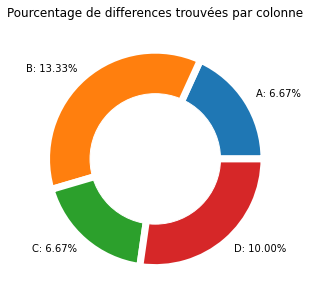

In [20]:
diff_percentages = get_column_difference_percentages(differences, original_data.dtypes)

display(diff_percentages)

# plotting
my_circle = plt.Circle( (0,0), 0.6, color='white')

diff_percentages.plot(kind="pie", 
        y="% of difference", 
        labels=diff_percentages["Column name"] + ": " + diff_percentages["% of difference"].map("{:,.2f}%".format), 
        title="Pourcentage de differences trouvées par colonne",
        wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' },
        figsize=(8, 5),
        legend=False,
        ylabel=""
                    )
p = plt.gcf()
p.gca().add_artist(my_circle)
p.set_facecolor('white')
plt.show()

**getting rows with most number of differences**

,Number of differences
x5myUBm1l4,3
xBTR9uEWh1,2
dPH0LDgsbn,1
hu03qvbiNl,1
3yTay9SMYU,1


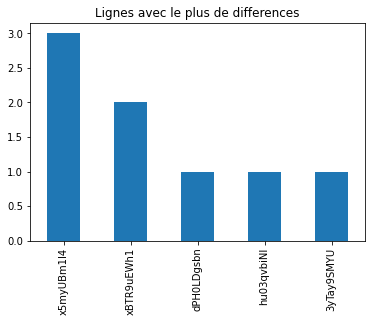

In [16]:
df_row_diffs = get_number_differenes_per_row(differences, limit=5)

display(df_row_diffs)

df_row_diffs.plot(kind='bar', title= "Lignes avec le plus de differences", legend=False)
plt.show()

**Getting the actual values of the differences**

In [17]:
formatted_differences = get_formatted_different_values(original_data, data_with_errors, differences)
formatted_differences

from      to
id         column                
x5myUBm1l4 B       0.1821  1.1821
           C       0.1287  2.1287
           D       0.0000     NaN
dPH0LDgsbn C      -0.3748  0.6252
xBTR9uEWh1 A       0.1513  1.1513
           B      -0.0443  0.9557
myGR7yw8wA B      -0.2566  0.7434
enpayLd4AH D       0.0000     NaN
3yTay9SMYU A      -0.0502  0.9498
hu03qvbiNl D      -0.0548  0.9452
sD6hp5i4kU B      -1.4416 -0.4416

**Common difference values**

count
column from    to            
D      0.0000  NaN          2
A      -0.0502 0.9498       1
       0.1513  1.1513       1
B      -1.4416 -0.4416      1
       -0.2566 0.7434       1

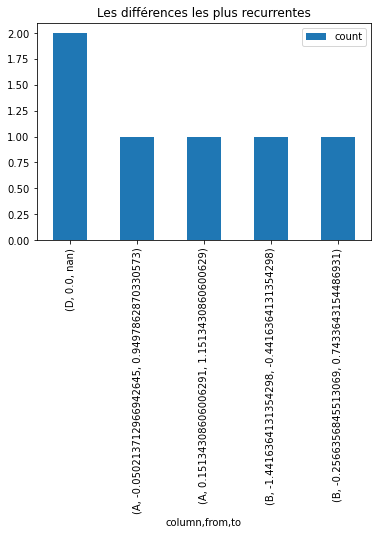

In [22]:
common_diffs = get_most_common_different_values_per_column(formatted_differences, limit=5)
display(common_diffs)
common_diffs.plot(kind="bar", title="Les différences les plus recurrentes")
plt.show()